### Training and validation accuracy and loss function visualization

In [9]:
def plot_result(history):
    # Visualization
    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

In [ ]:
# IMPORTS AND SETUP
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Resizing, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, UpSampling2D, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16, MobileNetV2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import KLDivergence, CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


### Student Model


--- EXPERIMENT 1: TRAINING STUDENT (BASELINE) ---


Model: "Simple_Student_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,051,018 (4.01 MB)

 Trainable params: 1,050,954 (4.01 MB)

 Non-trainable params: 64 (256.00 B)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.2923 - loss: 2.0416 - val_accuracy: 0.4502 - val_loss: 1.7973
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4540 - loss: 1.4993 - val_accuracy: 0.5306 - val_loss: 1.3331
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5134 - loss: 1.3434 - val_accuracy: 0.5655 - val_loss: 1.2239
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5483 - loss: 1.2541 - val_accuracy: 0.5985 - val_loss: 1.1408
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5769 - loss: 1.1802 - val_accuracy: 0.6151 - val_loss: 1.1086
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5991 - loss: 1.1216 - val_accuracy: 0.6034 - val_loss: 1.1051
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6182 - loss: 1.0652 - val_accuracy: 0.5848 - val_loss: 1.2092
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6328 - loss: 1.0271 - val_accuracy: 0

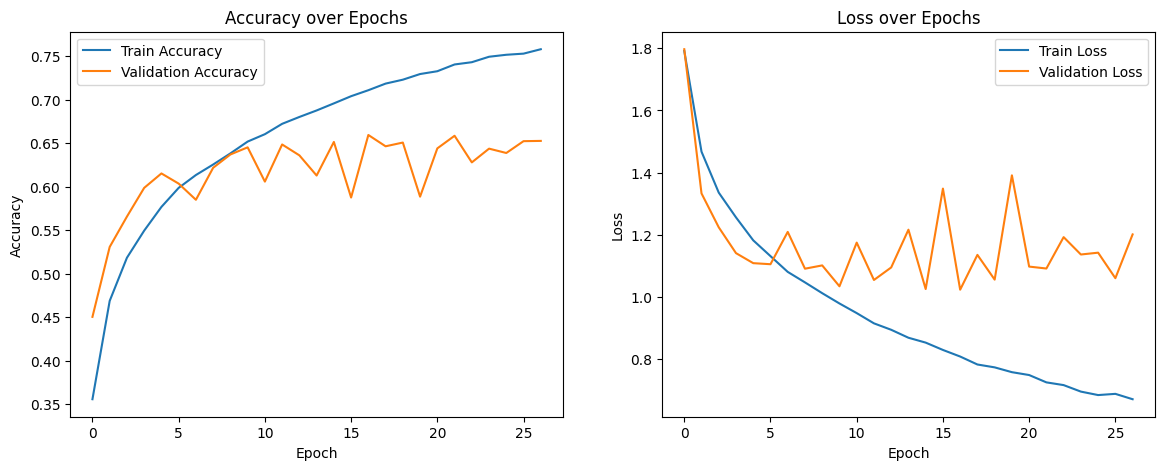

Baseline Student Test Accuracy: 0.6456


In [ ]:
# LOAD DATA
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train.astype('float32') / 255.0, x_test.astype('float32') / 255.0
y_train_cat, y_test_cat = to_categorical(y_train, 10), to_categorical(y_test, 10)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# STUDENT MODEL ARCHITECTURE
def create_student_model(input_shape=(32, 32, 3), num_classes=10):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    return Model(inputs, outputs, name="Simple_Student_CNN")

# Student model training and evalution 
print("\n" + "="*30 + "\n--- EXPERIMENT 1: TRAINING STUDENT (BASELINE) ---\n" + "="*30)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
results = {}
histories = {}

student_baseline = create_student_model()
student_baseline.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
student_baseline.summary()

history_student_baseline = student_baseline.fit(
    x_train, y_train_cat,
    validation_split=0.2,
    epochs=50,
    batch_size=128,
    callbacks=[early_stopping],
    verbose=1
)

plot_result(history_student_baseline)

# Evaluate and store results
loss, acc = student_baseline.evaluate(x_test, y_test_cat, verbose=0)
results["Student_Baseline"] = {"Test Loss": loss, "Test Accuracy": acc}
histories["Student_Baseline"] = history_student_baseline
print(f"Baseline Student Test Accuracy: {acc:.4f}")


### Teacher models


--- EXPERIMENT 2: TRAINING TEACHERS ---

--- Training Teacher 1: VGG16 ---
Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 55s 137ms/step - accuracy: 0.4578 - loss: 1.5546 - val_accuracy: 0.7802 - val_loss: 0.6648
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 60s 93ms/step - accuracy: 0.7984 - loss: 0.6219 - val_accuracy: 0.8240 - val_loss: 0.5282
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 100ms/step - accuracy: 0.8670 - loss: 0.4118 - val_accuracy: 0.8461 - val_loss: 0.4603
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 94ms/step - accuracy: 0.9099 - loss: 0.2696 - val_accuracy: 0.8368 - val_loss: 0.5163
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 100ms/step - accuracy: 0.9408 - loss: 0.1853 - val_accuracy: 0.8541 - val_loss: 0.4709
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 102ms/step - accuracy: 0.9640 - loss: 0.1127 - val_accuracy: 0.8425 - val_loss: 0.5887
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 95ms/step - accuracy: 0.9691 - loss: 0.1003 - val_accuracy: 0.8612 - val_loss: 0.5496
Epoch 8/50

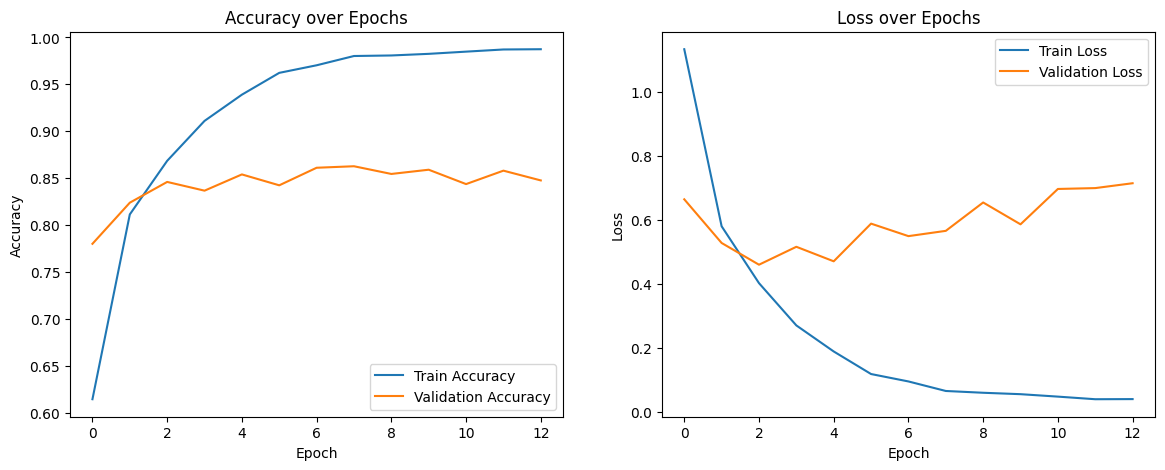

VGG16 Teacher Test Accuracy: 0.8419

--- Training Teacher 2: MobileNetV2 ---


/tmp/ipython-input-18-416644632.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = base_model_class(include_top=False, weights='imagenet', input_shape=None)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.3107 - loss: 2.1863 - val_accuracy: 0.2030 - val_loss: 2.2354
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5153 - loss: 1.4002 - val_accuracy: 0.2573 - val_loss: 2.0770
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5801 - loss: 1.2098 - val_accuracy: 0.2708 - val_loss: 2.1759
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6049 - loss: 1.1357 - val_accuracy: 0.2630 - val_loss: 2.2491
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6346 - loss: 1.0421 - val_accuracy: 0.3309 - val_loss: 2.0061
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6586 - loss: 0.9795 - val_accuracy: 0.3643 - val_loss: 1.8939
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6773 - loss: 0.9186 - val_accuracy: 0.4522 - val_loss: 1.5850
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms

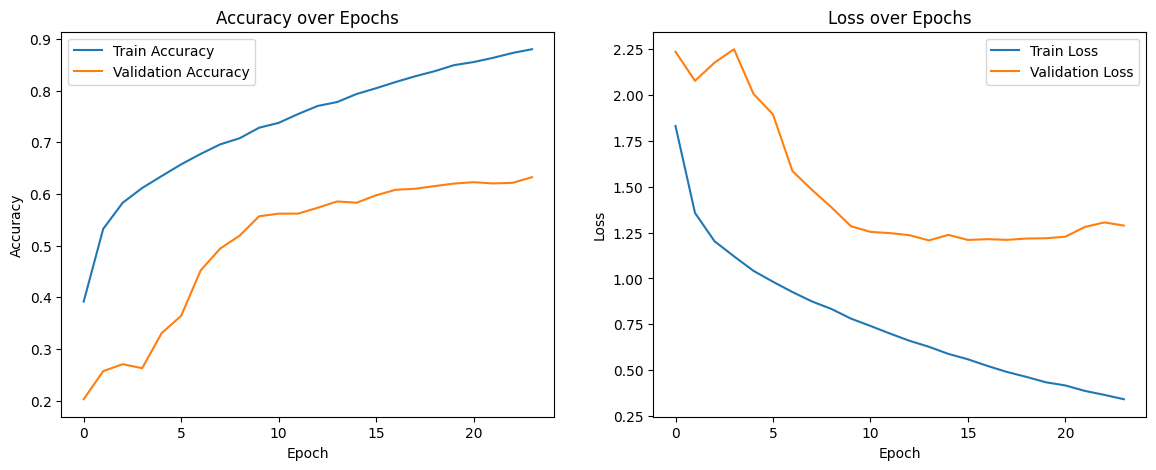

MobileNetV2 Teacher Test Accuracy: 0.5936


In [ ]:
# TEACHER MODEL ARCHITECTURE
def create_teacher_model(base_model_class, model_name, layers_to_unfreeze=10):
    base_model = base_model_class(include_top=False, weights='imagenet', input_shape=None)
    base_model.trainable = False
    for layer in base_model.layers[-layers_to_unfreeze:]:
        layer.trainable = True

    inputs = Input(shape=(32, 32, 3))
    x = Resizing(48, 48)(inputs)
    x = base_model(x, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(10, activation='softmax')(x)

    model = Model(inputs, outputs, name=model_name)
    return model

# TRAINING AND EVALUTING TEACHER MODELS
print("\n" + "="*30 + "\n--- EXPERIMENT 2: TRAINING TEACHERS ---\n" + "="*30)

# Train VGG16 Teacher
print("\n--- Training Teacher 1: VGG16 ---")
teacher_vgg16 = create_teacher_model(VGG16, "Teacher_VGG16")
teacher_vgg16.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
history_teacher_vgg16 = teacher_vgg16.fit(x_train, y_train_cat, validation_split=0.2, epochs=50, batch_size=128, callbacks=[early_stopping], verbose=1)

plot_result(history_teacher_vgg16)

loss, acc = teacher_vgg16.evaluate(x_test, y_test_cat, verbose=0)
results["Teacher_VGG16"] = {"Test Loss": loss, "Test Accuracy": acc}
histories["Teacher_VGG16"] = history_teacher_vgg16
print(f"VGG16 Teacher Test Accuracy: {acc:.4f}")

# Train MobileNetV2 Teacher 
print("\n--- Training Teacher 2: MobileNetV2 ---")
teacher_mobilenet = create_teacher_model(MobileNetV2, "Teacher_MobileNetV2")
teacher_mobilenet.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
history_teacher_mobilenet = teacher_mobilenet.fit(x_train, y_train_cat, validation_split=0.2, epochs=50, batch_size=128, callbacks=[early_stopping], verbose=1)

plot_result(history_teacher_mobilenet)

loss, acc = teacher_mobilenet.evaluate(x_test, y_test_cat, verbose=0)
results["Teacher_MobileNetV2"] = {"Test Loss": loss, "Test Accuracy": acc}
histories["Teacher_MobileNetV2"] = history_teacher_mobilenet
print(f"MobileNetV2 Teacher Test Accuracy: {acc:.4f}")

### Knowdlge distiler class

In [ ]:
class Distiller(Model):
    def __init__(self, student, teachers):
        super().__init__()
        self.student = student
        self.teachers = teachers if isinstance(teachers, list) else [teachers]

    def compile(self, optimizer, metrics, student_loss_fn, distillation_loss_fn, alpha=0.1, temperature=3):
        super().compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.alpha = alpha
        self.temperature = temperature

    def train_step(self, data):
        x, y = data
        teacher_predictions = [teacher(x, training=False) for teacher in self.teachers]
        avg_teacher_predictions = tf.reduce_mean(teacher_predictions, axis=0)
        with tf.GradientTape() as tape:
            student_predictions = self.student(x, training=True)
            student_loss = self.student_loss_fn(y, student_predictions)
            distillation_loss = self.distillation_loss_fn(
                tf.nn.softmax(avg_teacher_predictions / self.temperature),
                tf.nn.softmax(student_predictions / self.temperature),
            )
            loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss
        trainable_vars = self.student.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))
        self.compiled_metrics.update_state(y, student_predictions)
        results = {m.name: m.result() for m in self.metrics}
        results.update({"student_loss": student_loss, "distillation_loss": distillation_loss})
        return results

    def test_step(self, data):
        x, y = data
        y_prediction = self.student(x, training=False)
        student_loss = self.student_loss_fn(y, y_prediction)
        self.compiled_metrics.update_state(y, y_prediction)
        results = {m.name: m.result() for m in self.metrics}
        results.update({"student_loss": student_loss})
        return results


### Signle Teacher Distillation

In [ ]:
print("\n" + "="*30 + "\n--- EXPERIMENT 3: SINGLE-TEACHER DISTILLATION ---\n" + "="*30)

# select the best teacher from the previous experiment
best_teacher = teacher_mobilenet if results["Teacher_MobileNetV2"]["Test Accuracy"] > results["Teacher_VGG16"]["Test Accuracy"] else teacher_vgg16
print(f"Using {best_teacher.name} as the single best teacher.")

# Create a new untrained, student model for this experiment
student_distilled_single = create_student_model()
distiller_single = Distiller(student=student_distilled_single, teachers=best_teacher)

# Compile the Distiller
distiller_single.compile(
    optimizer='adam',
    metrics=['accuracy'],
    student_loss_fn=CategoricalCrossentropy(),
    distillation_loss_fn=KLDivergence(),
    alpha=0.1,
    temperature=10
)

early_stopping_distiller = EarlyStopping(monitor='val_student_loss', patience=10, restore_best_weights=True, verbose=1)

# Train the Distiller model
history_distiller_single = distiller_single.fit(
    x_train, y_train_cat,
    validation_data=(x_test, y_test_cat),
    epochs=50,
    batch_size=128,
    verbose=1
)

# Evalution the distiller
eval_results = distiller_single.evaluate(x_test, y_test_cat, verbose=0)
total_loss, metrics_dict, student_loss = eval_results

# Store the results and history for comparison
results["Student_Distilled_Single_Teacher"] = {
    "Test Loss": float(student_loss.numpy()),
    "Test Accuracy": float(metrics_dict["accuracy"].numpy())
}
histories["Student_Distilled_Single_Teacher"] = history_distiller_single
print(f"Student with Single Teacher Test Accuracy: {results['Student_Distilled_Single_Teacher']['Test Accuracy']:.4f}")


--- EXPERIMENT 3: SINGLE-TEACHER DISTILLATION ---
Using Teacher_VGG16 as the single best teacher.
Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 51ms/step - accuracy: 0.3051 - distillation_loss: 3.1702e-04 - loss: 0.1000 - student_loss: 1.7631 - val_loss: 0.1000 - val_student_loss: 1.5860
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 42ms/step - accuracy: 0.4741 - distillation_loss: 2.6242e-04 - loss: 0.1000 - student_loss: 1.4245 - val_loss: 0.1000 - val_student_loss: 1.5321
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.5331 - distillation_loss: 2.3822e-04 - loss: 0.1000 - student_loss: 1.2960 - val_loss: 0.1000 - val_student_loss: 0.9231
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.5744 - distillation_loss: 2.2191e-04 - loss: 0.1000 - student_loss: 1.2098 - val_loss: 0.1000 - val_student_loss: 0.7498
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.5998 - distillation_loss: 2.0955e-04 - loss: 0.1000 - student_loss: 1.1409 - 

### Multi Teacher Distillation

In [ ]:
print("\n" + "="*30 + "\n--- EXPERIMENT 4: MULTI-TEACHER DISTILLATION ---\n" + "="*30)

# Create a new, untrained student model
student_distilled_multi = create_student_model()

# Pass a list of both trained teachers to the Distiller
distiller_multi = Distiller(student=student_distilled_multi, teachers=[teacher_vgg16, teacher_mobilenet])

# Compile the Distiller model
distiller_multi.compile(
    optimizer='adam',
    metrics=['accuracy'],
    student_loss_fn=CategoricalCrossentropy(),
    distillation_loss_fn=KLDivergence(),
    alpha=0.1,
    temperature=10
)

# Train the distillation model
history_distiller_multi = distiller_multi.fit(
    x_train, y_train_cat,
    validation_data=(x_test, y_test_cat),
    epochs=50,
    batch_size=128,
    verbose=1
)



--- EXPERIMENT 4: MULTI-TEACHER DISTILLATION ---
Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 79s 67ms/step - accuracy: 0.3146 - distillation_loss: 2.1421e-04 - loss: 0.1000 - student_loss: 1.7265 - val_loss: 0.1000 - val_student_loss: 1.5652
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.4878 - distillation_loss: 1.7471e-04 - loss: 0.1000 - student_loss: 1.3959 - val_loss: 0.1000 - val_student_loss: 1.2426
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.5418 - distillation_loss: 1.6003e-04 - loss: 0.1000 - student_loss: 1.2779 - val_loss: 0.1000 - val_student_loss: 1.1909
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.5766 - distillation_loss: 1.5075e-04 - loss: 0.1000 - student_loss: 1.1884 - val_loss: 0.1000 - val_student_loss: 1.2366
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.6014 - distillation_loss: 1.4410e-04 - loss: 0.1000 - student_loss: 1.1323 - val_loss: 0.1000 - val_student_loss: 1.0081
Epoch

### Evaluition the multi Teacher Distillation

In [ ]:
# Evaluate the model 
eval_results = distiller_multi.evaluate(x_test, y_test_cat, verbose=0)

# Extract accuracy and loss
if isinstance(eval_results, dict):
    acc = eval_results.get('accuracy')
    loss = eval_results.get('student_loss')
else:
    acc = eval_results[1]['accuracy'] if isinstance(eval_results[1], dict) else None
    loss = eval_results[0]

# Store results and training history
results["Student_Distilled_Multi_Teacher"] = {"Test Loss": float(loss), "Test Accuracy": float(acc)}
histories["Student_Distilled_Multi_Teacher"] = history_distiller_multi

print(f"Student with Multi-Teacher Test Accuracy: {acc:.4f}")


Student with Multi-Teacher Test Accuracy: 0.6711


### Final Performance Visualization

In [ ]:
results_df = pd.DataFrame(results).T.sort_values(by="Test Accuracy", ascending=False)
print("\n\n" + "="*50)
print("=== FINAL PERFORMANCE COMPARISON ===")
print(results_df)
print("="*50)




=== FINAL PERFORMANCE COMPARISON ===
                                  Test Loss  Test Accuracy
Teacher_VGG16                      0.478062         0.8419
Student_Distilled_Single_Teacher   1.123541         0.6908
Student_Distilled_Multi_Teacher    0.100000         0.6711
Student_Baseline                   1.043830         0.6456
Teacher_MobileNetV2                1.182461         0.5936


### Visualization the Overall Result in BarPlot

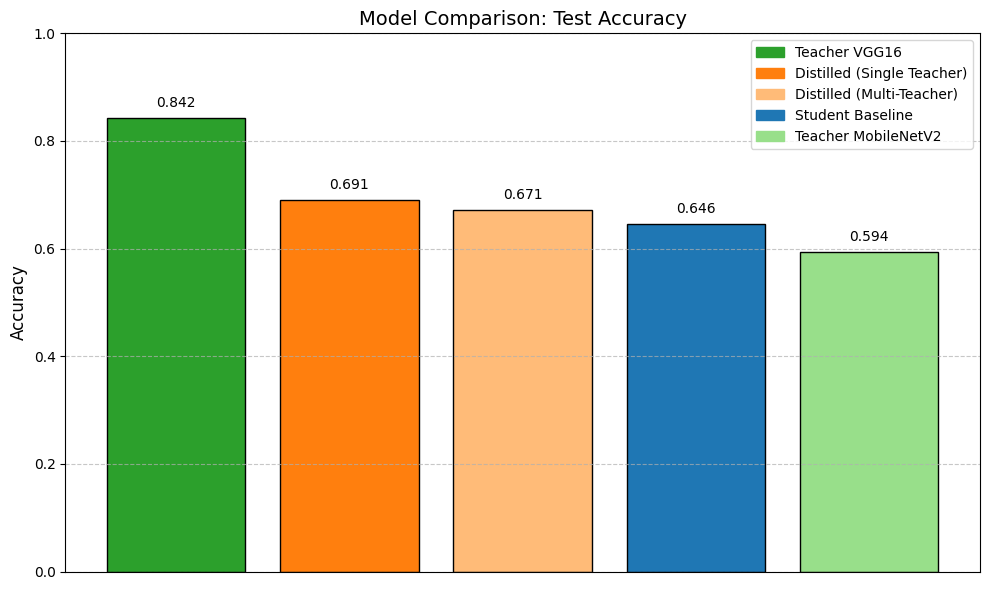

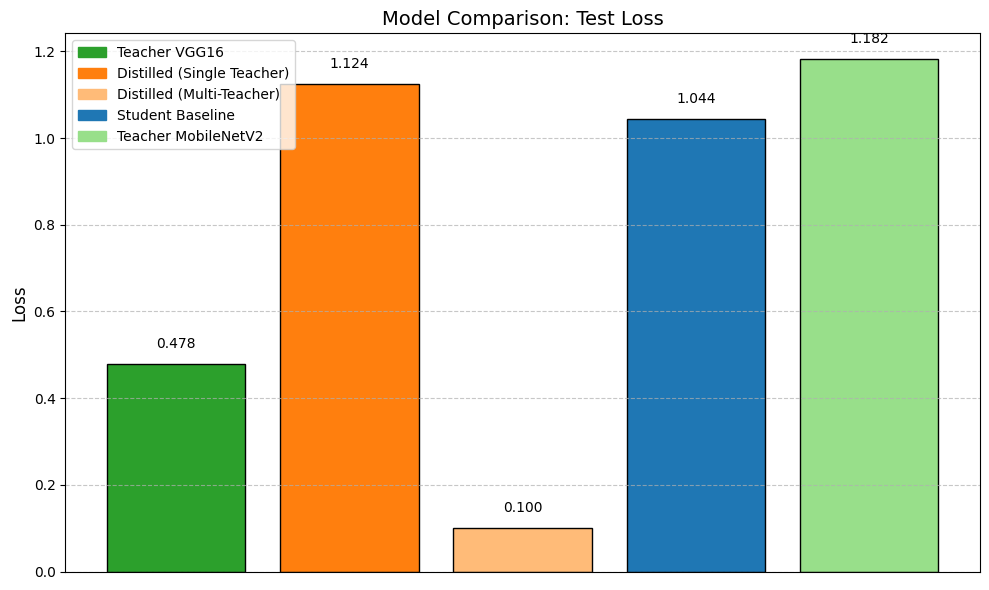

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the final results
data = {
    "Model": [
        "Teacher_VGG16",
        "Student_Distilled_Single_Teacher",
        "Student_Distilled_Multi_Teacher",
        "Student_Baseline",
        "Teacher_MobileNetV2"
    ],
    "Test Loss": [
        0.478062,
        1.123541,
        0.100000,
        1.043830,
        1.182461
    ],
    "Test Accuracy": [
        0.8419,
        0.6908,
        0.6711,
        0.6456,
        0.5936
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define colors by group
color_map = {
    "Teacher_VGG16": "#2ca02c",                        
    "Teacher_MobileNetV2": "#98df8a",                  
    "Student_Baseline": "#1f77b4",                    
    "Student_Distilled_Single_Teacher": "#ff7f0e",     
    "Student_Distilled_Multi_Teacher": "#ffbb78"       
}
colors = [color_map[model] for model in df["Model"]]

# Labels for legend
legend_labels = {
    "Teacher_VGG16": "Teacher VGG16",
    "Teacher_MobileNetV2": "Teacher MobileNetV2",
    "Student_Distilled_Single_Teacher": "Distilled (Single Teacher)",
    "Student_Distilled_Multi_Teacher": "Distilled (Multi-Teacher)",
    "Student_Baseline": "Student Baseline"
}

# Test Accuracy 
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(df)), df["Test Accuracy"], color=colors, edgecolor='black')

# Title and Labels
plt.title("Model Comparison: Test Accuracy", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks([])

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.015,
             f"{height:.3f}", ha='center', va='bottom', fontsize=10)

# Legend
legend_handles = [plt.Rectangle((0,0),1,1, color=color_map[model]) for model in df["Model"]]
legend_names = [legend_labels[model] for model in df["Model"]]
plt.legend(legend_handles, legend_names, loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

# Test Loss 
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(df)), df["Test Loss"], color=colors, edgecolor='black')

# Title and Labels
plt.title("Model Comparison: Test Loss", fontsize=14)
plt.ylabel("Loss", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks([])

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.03,
             f"{height:.3f}", ha='center', va='bottom', fontsize=10)

# Legend
plt.legend(legend_handles, legend_names, loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()
